In [3]:
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [25]:
tf.keras.layers.LocallyConnected2D

keras.layers.local.LocallyConnected2D

convolution의 단점을 보완함, fully connected는 간혹 이미지에서 불리

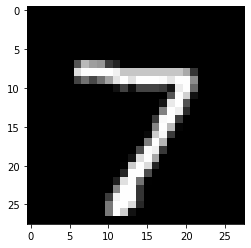

In [11]:
plt.imshow(X_test[0], cmap='gray')

1. 정통적인 모델은 크기나 위치를 조금만 변경시키면 뭔지 모름
- ex) 제3분면에 있는 8을 잘라내서 resize하는 기술이 필요함
- 1차 연산의 특징인 linear 연산을 convolution 써서 이미지를 feature 형태로 변환시킴=> feature extraction이라 볼 수 있음 (convolution의 kernel에 따라 이미지 변화가 다름, kernel만 잘 고르면 classification이 잘 되는 feature 추출할 수 있음)
2. 어떻게 kernel을 선택할까? 학습을 통하자
- feature extraction 기법의 결과가 직관적이지 않았음, 사람의 관점에서는 찾을 수 없었다는 것
3. 어떻게 학습시킬까? 정답값을 통한 supervised
4. 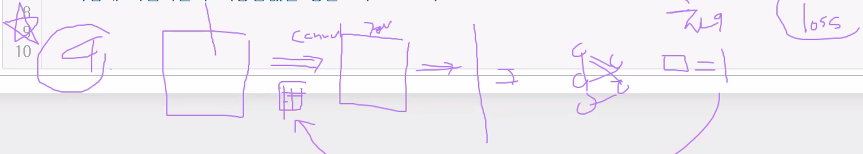
5. Non-linearity / Multiple
6. Layer (퍼셉트론 대신 convolution으로 바꾼) https://poloclub.github.io/cnn-explainer/

supervised는 loss function을 만들어서 loss를 줄이면 됨

예측값과 정답값

In [15]:
from skimage.util import view_as_blocks, view_as_windows
from skimage.data import astronaut, camera

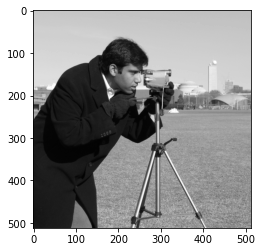

In [18]:
data=camera()
plt.imshow(data, cmap='gray')

In [21]:
data.shape

(512, 512)

In [19]:
view_as_blocks(data, (4,4)).shape

(128, 128, 4, 4)

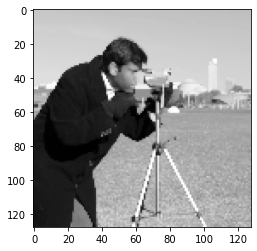

In [24]:
x=view_as_blocks(data, (4,4)).reshape(128,128,16)
plt.imshow(x.max(axis=2), cmap='gray')

디테일은 줄어들지만 global한 의미는 살아있음

In [20]:
view_as_windows(data, (4,4)).shape

(509, 509, 4, 4)

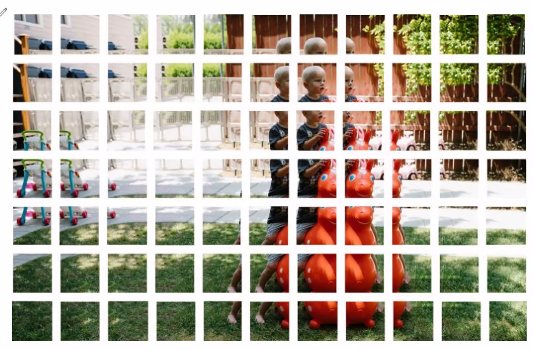

In [ ]:
#!pip install -U visualkeras
#inception=tf.keras.applications.InceptionResNetV2()
#tf.keras.utils.plot_model(inception)

In [35]:
import tensorflow as tf

In [40]:
input_=tf.keras.Input((28,28))
x=tf.keras.layers.Flatten()(input_)
model1=tf.keras.Model(input_, x)

input과 ouput을 지정해줌

In [42]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28)),
    tf.keras.layers.Flatten()
])

In [39]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


model1과 비교했을 때 미묘하게 다름

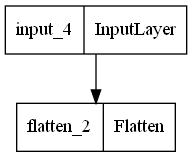

In [43]:
tf.keras.utils.plot_model(model1)

In [44]:
input_ =tf.keras.Input((28,28))
x=tf.keras.layers.Flatten()(input_)
x=tf.keras.layers.Dense(128)(x)
x=tf.keras.layers.Dense(10)(x)
model=tf.keras.Model(input_, x)

Flatten 결과를 다시 Dense 레이어에 집어넣음, 아래의 sequential 모델을 functional API 방식으로 바꾼 것

```
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
```

In [45]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [57]:
flatten=tf.keras.layers.Flatten(input_shape=(28,28))
dense1=tf.keras.layers.Dense(128, activation='relu')
dense2=tf.keras.layers.Dense(10)

In [60]:
x=dense2(dense1(flatten(input_)))
x

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_7')>

In [61]:
x=flatten(input_)
x=dense1(x)
x=dense2(x)
x

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_7')>

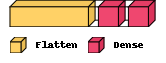

In [52]:
visualkeras.layered_view(model, legend=True)

1. oop (camel style)
2. functional (snake style)
3. string (function의 이름) argument를 바꿀 필요 없을 때 단축 표현

In [64]:
from functools import partial

In [70]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

argument 변경시

In [71]:
loss=partial(tf.keras.losses.sparse_categorical_crossentropy, from_logits=True)

In [72]:
def myloss(from_logits):
    loss=partial(tf.keras.losses.sparse_categorical_crossentropy, from_logits=from_logits)
    return loss

## 7/21목

- for: 속도가 느림(이론적)
- matrix, vector: vectorization하는 기법, numpy의 convolution
- tensor: 4차원 연산(여러개의 값을 동시에 연산하는 방법)으로 결과를 냄, convolution 연산을 더욱 빠르게

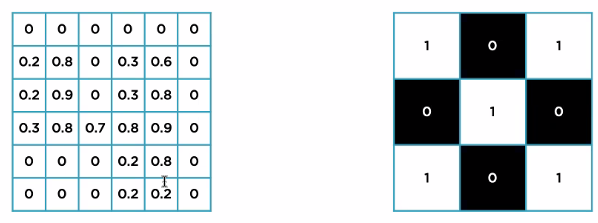
왼쪽의 input image가 있을 때, 오른쪽의 kernel을 한칸씩 이동해가면서 전체 convolution을 구하더라

In [2]:
import numpy as np
from skimage import data

In [3]:
inputs=data.camera()
inputs.shape

(512, 512)

In [23]:
kernel=np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])
feature_map=np.zeros( (inputs.shape[0]-kernel.shape[0]+1, inputs.shape[1]-kernel.shape[1]+1), dtype=np.uint8)
feature_map1=np.zeros( (inputs.shape[0]-kernel.shape[0]+1, inputs.shape[1]-kernel.shape[1]+1))

In [19]:
feature_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

input으로 들어오는 camera의 shape은 512x512이므로, kernel이 3x3이라 치면 결과는 512-3+1=510이 됨, 따라서 (512-3+1, 512-3+1)만큼 미리 0으로 채워둠

In [25]:
for x in range(inputs.shape[0]-kernel.shape[0]+1):
    for y in range(inputs.shape[1]-kernel.shape[1]+1):
        feature_map[x][y]=x+y
        feature_map1[x][y]=x+y

In [21]:
feature_map

array([[  0,   1,   2, ..., 251, 252, 253],
       [  1,   2,   3, ..., 252, 253, 254],
       [  2,   3,   4, ..., 253, 254, 255],
       ...,
       [251, 252, 253, ..., 246, 247, 248],
       [252, 253, 254, ..., 247, 248, 249],
       [253, 254, 255, ..., 248, 249, 250]], dtype=uint8)

In [26]:
feature_map1

array([[0.000e+00, 1.000e+00, 2.000e+00, ..., 5.070e+02, 5.080e+02,
        5.090e+02],
       [1.000e+00, 2.000e+00, 3.000e+00, ..., 5.080e+02, 5.090e+02,
        5.100e+02],
       [2.000e+00, 3.000e+00, 4.000e+00, ..., 5.090e+02, 5.100e+02,
        5.110e+02],
       ...,
       [5.070e+02, 5.080e+02, 5.090e+02, ..., 1.014e+03, 1.015e+03,
        1.016e+03],
       [5.080e+02, 5.090e+02, 5.100e+02, ..., 1.015e+03, 1.016e+03,
        1.017e+03],
       [5.090e+02, 5.100e+02, 5.110e+02, ..., 1.016e+03, 1.017e+03,
        1.018e+03]])

feature_map의 데이터타입을 uint8로 바꾸어서 실수 대신 정수로 만들어 이해할 수 있게 만듦

In [32]:
kernel1=np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])

In [33]:
kernel2=np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

convolution 연산을 어떻게 할까, 참고로 kernel1과 2의 shape은 3x3

In [34]:
for i in range(kernel1.shape[0]):
    for j in range(kernel1.shape[1]):
        print(kernel1[i]*kernel2[j])

[1 4 9]
[ 4 10 18]
[ 7 16 27]
[ 4 10 18]
[16 25 36]
[28 40 54]
[ 7 16 27]
[28 40 54]
[49 64 81]


In [35]:
temp=np.zeros(1)
for i in range(kernel1.shape[0]):
    for j in range(kernel1.shape[1]):
        temp+=kernel1[i][j]+kernel2[i][j]

In [38]:
temp

array([90.])

accumulation pattern, 대표적인 것이 합을 구하는 코드
```
sum=0
for i in range(10): sum+=i
```
```
sum=0
for i in range(10):
    if i%2==0: sum+=i
```

### convolution 기본적인 구현

In [50]:
feature_map=np.zeros((inputs.shape[0]-kernel.shape[0]+1, inputs.shape[1]-kernel.shape[1]+1),
                     dtype=np.uint8)

In [51]:
%%timeit
for h in range(inputs.shape[0]-kernel.shape[0]+1):
    for w in range(inputs.shape[1]-kernel.shape[1]+1):
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                feature_map[h][w]+=kernel[i][j]*inputs[h+i][w+j]

16.6 s ± 879 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
feature_map

array([[ 40, 128, 160, ...,   8,  24,  40],
       [ 88,  88,  64, ...,  48,  48,  48],
       [224, 208, 120, ..., 176, 112, 176],
       ...,
       [ 48, 136, 200, ...,  96, 216,  40],
       [248,  64, 160, ..., 200,  16, 160],
       [ 24, 168, 184, ..., 168,  32, 248]], dtype=uint8)

이론적으로 배우는 convolution을 구현해본 것인데 연산이 매우매우 느림, kernel은 똑같은데 inputs이 한칸씩 움직여야하므로 h+ w+를 추가해줌

### 두번째 구현

In [54]:
inputs

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [55]:
kernel

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [56]:
convolve2d(inputs, kernel, 'valid')

array([[8985, 8984, 8980, ..., 8535, 8533, 8541],
       [8969, 8969, 8972, ..., 8550, 8550, 8550],
       [8972, 8974, 8975, ..., 8554, 8552, 8554],
       ...,
       [1152, 1143, 1127, ..., 6742, 6793, 6109],
       [1149, 1142, 1122, ..., 6605, 6928, 6680],
       [1145, 1139, 1129, ..., 6733, 6624, 6487]])

In [57]:
kernel=kernel.astype('uint8')
convolve2d(inputs, kernel, 'valid')

array([[ 25,  24,  20, ...,  87,  85,  93],
       [  9,   9,  12, ..., 102, 102, 102],
       [ 12,  14,  15, ..., 106, 104, 106],
       ...,
       [128, 119, 103, ...,  86, 137, 221],
       [125, 118,  98, ..., 205,  16,  24],
       [121, 115, 105, ...,  77, 224,  87]], dtype=uint8)

kernel을 uint8로 지정해줘야 modular 연산(255 넘어가면 다시 0부터 시작하는 연산)을 함

convolution 연산은 처음에 flip 해야함~

In [73]:
kernel=kernel[::-1,::-1]

In [74]:
kernel

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]], dtype=uint8)

In [79]:
feature_map=np.zeros((inputs.shape[0]-kernel.shape[0]+1, inputs.shape[1]-kernel.shape[1]+1),
                     dtype=np.uint8)

In [80]:
%%timeit
for h in range(inputs.shape[0]-kernel.shape[0]+1):
    for w in range(inputs.shape[1]-kernel.shape[1]+1):
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                feature_map[h][w]+=kernel[i][j]*inputs[h+i][w+j]

<magic-timeit>:5: RuntimeWarning: overflow encountered in ubyte_scalars


14.4 s ± 3.55 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
from scipy.signal import convolve2d

In [81]:
%timeit convolve2d(inputs,kernel,'valid')

25.8 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## einsum

In [82]:
import numpy as np

In [83]:
a=np.arange(24).reshape(4,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [84]:
a.strides

(24, 4)

In [86]:
a=np.array([1,2,3,4])
b=np.array([[1,2],[3,4]])
b

array([[1, 2],
       [3, 4]])

In [106]:
np.einsum('xx',b)

5

In [107]:
np.einsum('xx -> x',b)

array([1, 4])

- xx: xx 꼴을 합해서 0꼴로 만들어라
- xx->x: xx 꼴을 x꼴로 만들어라

In [91]:
np.einsum('xy -> yx',b)

array([[1, 3],
       [2, 4]])

In [92]:
np.einsum('xy ->',b)

10

## b*b

In [101]:
np.einsum('xy,xy ->', b,b)

30

문자열에 콤마(,)가 들어가면 parameter도 2개가 들어가야 함, 위 결과는 아래의 1,4,9,16을 모두 더해서 30이 나온 것

In [98]:
b*b

array([[ 1,  4],
       [ 9, 16]])

In [99]:
np.einsum('xy,xy -> x', b,b)

array([ 5, 25])

1과 4 합치니까 5, 9와 16 합치니까 25

In [100]:
np.einsum('xy,xy -> y', b,b)

array([10, 20])

반대로 x를 없애고 y를 남기니까, 1과 9 합쳐서 10, 4과 16합쳐서 20이 됨, axis 개념이라 볼 수 있음

## b@b

In [102]:
np.einsum('xy,yx ->', b,b)

29

In [103]:
b@b

array([[ 7, 10],
       [15, 22]])

In [111]:
print( np.einsum('b,b ->', a,a) )
print( np.einsum('b,b -> b', a,a) ) #a*a와 같음
print( np.einsum('a,b -> ab', a,a) )

30
[ 1  4  9 16]
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]


In [115]:
a**a

array([  1,   4,  27, 256], dtype=int32)

## Loss와 Accuracy 시각화

In [116]:
import tensorflow as tf

In [117]:
(X_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [118]:
X_train.shape

(60000, 28, 28)

In [119]:
X_train.dtype

dtype('uint8')

바로 model이나 conv2d에 사용하려고 하면 error가 나는 것을 명심해야함, conv을 쓰려고 한다면 data가 3차원이어야 함

In [121]:
X_train=X_train[..., tf.newaxis]/255

In [129]:
input_=tf.keras.Input((28,28,1))
x=tf.keras.layers.Conv2D(32,3)(input_) #2의 배수 vectorization
x=tf.keras.layers.ReLU()(x)            #batch normalization
x=tf.keras.layers.Conv2D(32,3)(x)
x=tf.keras.layers.ReLU()(x)

#feature extractor
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(128)(x)
x=tf.keras.layers.ReLU()(x)
x=tf.keras.layers.Dense(10)(x)

conv2d와 relu까지는 예측능력이 없으며, (None,24,24,32)라는 3차원을 1차원으로 줄여줘야 fully connected에 집어넣을 수 있음, 마지막에는 0부터 9까지 구별해야 하므로 10개로 나오게 함(softmax를 안 써도 되긴 함=>로직 테크닉)

In [130]:
model=tf.keras.Model(input_,x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 re_lu_10 (ReLU)             (None, 26, 26, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 re_lu_11 (ReLU)             (None, 24, 24, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2359

In [131]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

loss 계산 뿐만 아니라 다양한 척도를 활용할 수 있음, optimizer는 아직~

In [143]:
history=model.fit(X_train, y_train, epochs=1, batch_size=1870)

33/33 [==============================] - 59s 2s/step - loss: 2.3716e-07 - accuracy: 1.0000


In [147]:
pd.DataFrame(history.history)

,loss,accuracy
0,2.371585e-07,1.0


***학습속도가 너무 느려서 에폭 1에 배치사이즈 크게함***

일반적으로 학습이 진행될 수록 training error는 떨어짐, 문제는 한번도 보지 못한 dataset에 대해서는 어느 순간 error가 올라감(이것이 overfitting 문제)

In [ ]:
import pandas as pd
pd.DataFrame(history.history)['accuracy'].plot.line()
pd.DataFrame(history.history)['loss'].plot.line()
pd.DataFrame(history.history)['loss','val_loss'].plot.line()

training data에 대해선 loss가 낮은데, 실제 검증데이터인 validation에 대해선 loss가 거의 떨어지지 않음=>학습 자체가 안 됐다 볼 수 있음, 모델이 제대로 만들어지지 않은 경우(underfit)

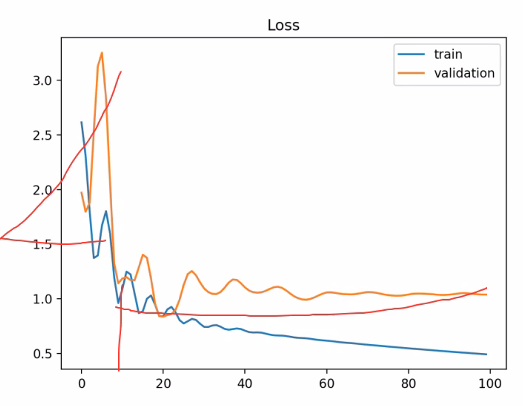

ㄴ학습데이터가 부족하거나 대표성을 띄지 않을 때 이럼(un-representative train dataset), 실질적으로 많이 나타나는 현상, batch가 골고루 펼쳐지지 않아서 부적절한 데이터가 들어가서 스파이크(왔다갔다)가 생김

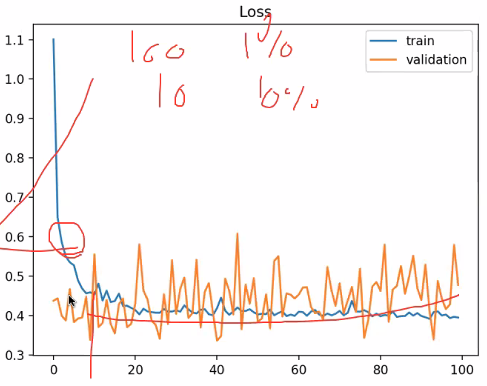

ㄴ스파이크 현상의 문제를 떠나서, validation loss가 train보다 낮으면 안됨=>dataset을 잘못 구성한 거

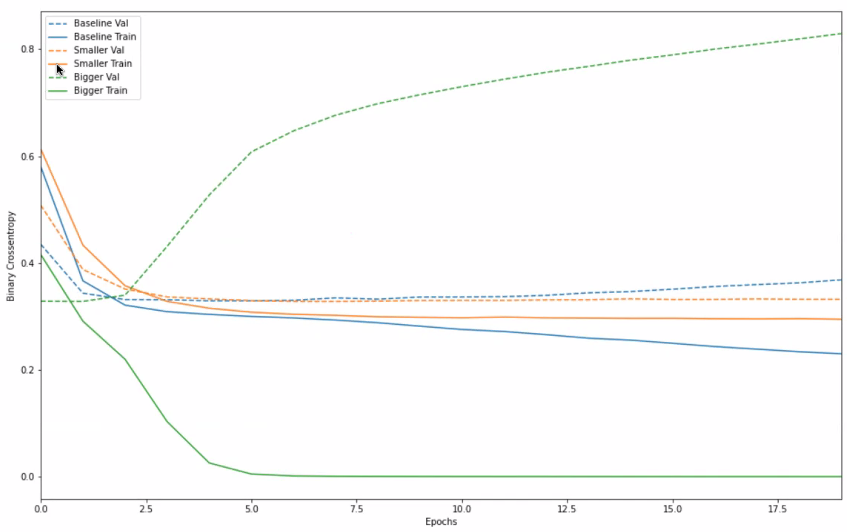

ㄴbigger model은 과적합이 너무 심하고, baseline과 smaller model은 epoch이 2~2.5쯤에서 overfitting에 걸림, 성능이 비슷할 때 무엇을 고르느냐(오컴의 면도날)... 간단한 것을 선택하면 데이터가 적게 들어가고 유지보수가 쉽고 각각 영향 받을 경우가 적다는 장점

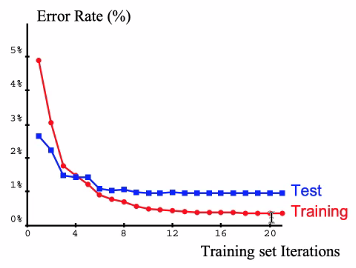

ㄴ이론과는 조금 다르게 training error가 test error보다 큰 구간이 있음=>학습이 완전히 되지 않은 상태, nerual network에서 많이 일어나는 현상

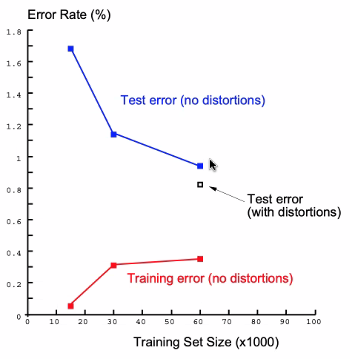

ㄴtest error는 낮아지고 있는데(=학습이 잘 되고 있는데) training error가 높아지고 있음=>위의 그래프는 interation이었는데 얘는 size에 대한 그래프임

**시각화 그래프를 보고, 모델을 어떻게 개선할지 해석/진단/결정하는 것이 중요함**

## 7/22금

- 정통적인 ML 모델은 대부분 plateau 현상(=더이상 성능이 올라가지 않는 고원현상)이 생김
- NN 모델은 태생적으로 학습에서 고려해야 하는 weight가 많기 때문에 성능이 높아짐, 대신 데이터가 부족하면 overfitting이 많이 생김

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=load_iris()

In [6]:
knn=KNeighborsClassifier()
train_size, train_score, test_score=learning_curve(knn, data.data, data.target)

In [4]:
#!pip install -U sklearn-evaluation


     ---------------------------------------- 45.2/45.2 kB 2.3 MB/s eta 0:00:00


In [7]:
import sklearn_evaluation

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

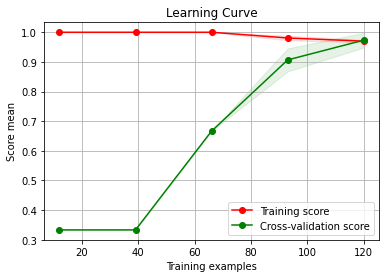

In [8]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

데이터가 너무 적음, 따라서 learning curve의 옵션에서 train sizes는 설정해보고자 함

In [10]:
import numpy as np
np.linspace(0.1,1.1,10, endpoint=False)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [11]:
train_size, train_score, test_score=learning_curve(knn, data.data, data.target,
                                                  train_sizes=np.linspace(0.1,1.1,10, endpoint=False))

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

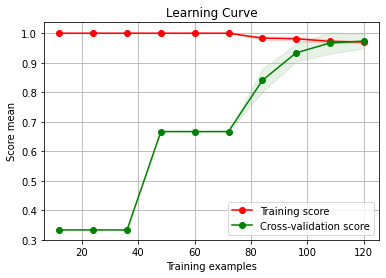

In [12]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

learning curve를 통해서 모델이 어느정도 수렴하는지 볼 수 있음

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tr

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

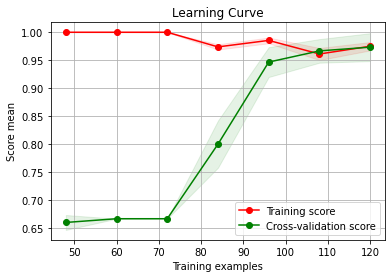

In [15]:
from sklearn.linear_model import LogisticRegression

train_size, train_score, test_score=learning_curve(LogisticRegression(), data.data, data.target,
                                                  train_sizes=np.linspace(0.1,1.1,10, endpoint=False))

sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

특징: 정통적인 ML기법은 타 프레임워크와 연동!!!

tensorflow에서 모든 learning curve를 제공하진 않음, 대신 연동 테크닉을 제공함

x축이 training set size인 그래프

일반적으로 training accuracy는 떨어지고, test accuracy는 올라감, epochs(iterations)인 그래프에서는 error가 

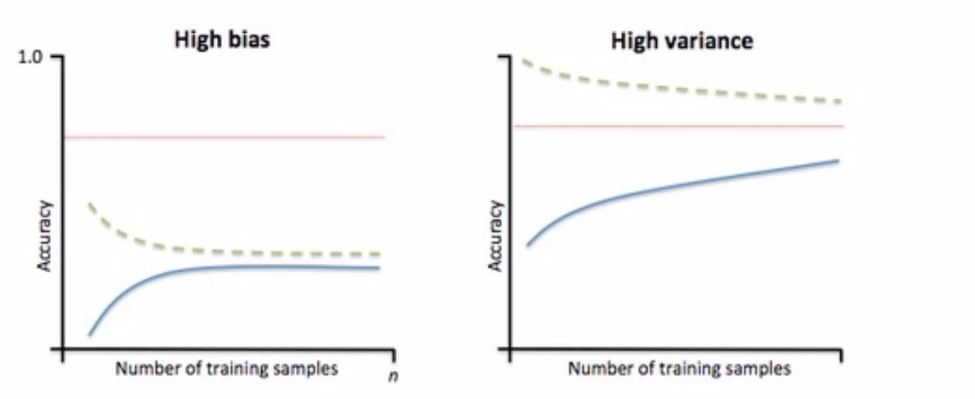
underfitting=>데이터 양에 따라서 training accuracy는 감소하다가 어느정도 수렴함, ***validation accuracy도 증가하긴 하지만 너무 낮은 정확도에서 수렴함***

In [100]:
import tensorflow as tf

In [101]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train[..., tf.newaxis]/255

In [102]:
input_=tf.keras.Input((28,28,1))
x=tf.keras.layers.Conv2D(32,3)(input_)
x=tf.keras.layers.ReLU()(x)
#x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(32,3)(x)
x=tf.keras.layers.ReLU()(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(128)(x)
x=tf.keras.layers.ReLU()(x)
x=tf.keras.layers.Dense(10)(x)

In [103]:
model=tf.keras.Model(input_, x)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [104]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.1096 - val_loss: 8.7299
Epoch 2/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0425 - val_loss: 15.7374
Epoch 3/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0308 - val_loss: 10.9910
Epoch 4/10
1875/1875 [==============================] - 151s 80ms/step - loss: 0.0216 - val_loss: 21.3630
Epoch 5/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0170 - val_loss: 26.9639
Epoch 6/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0127 - val_loss: 34.5603
Epoch 7/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0106 - val_loss: 29.8761
Epoch 8/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0070 - val_loss: 35.7700
Epoch 9/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0061 - val_loss: 42.5940
Epoch 10/10
1875/1875 [========================

In [28]:
import pandas as pd
pd.DataFrame(history.history)[['loss','val_loss']].plot.line()

NameError: name 'history' is not defined

왜 val loss가 왔다갔다일까? X_test 형태가 X_train과 같지 않음                                                                                                                                                        

In [ ]:
X_train,X_test=X_train[..., tf.newaxis]/255, X_test[..., tf.newaxis]/255

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

pd.DataFrame(history.history)[['loss','val_loss']].plot.line(figsize=(10,5))

overfitting임, loss는 떨어지고, val loss는 떨어졌다가 올라가는 것 없이 쭉 증가하기 때문임

pooling을 하니까 학습이 잘 됨, 데이터가 부족하거나 편중되면 val loss에서 감소가 발생하는데 어느정도 쓸만한 모델이며, 에폭 6쯤에서 잘라서 씀

## 함수형 패러다임

In [27]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [29]:
def build_fn():
    input_=tf.keras.Input((28,28,1))
    x=tf.keras.layers.Conv2D(32,3)(input_)
    x=tf.keras.layers.ReLU()(x)
    x=tf.keras.layers.MaxPool2D()(x)
    x=tf.keras.layers.Conv2D(32,3)(x)
    x=tf.keras.layers.ReLU()(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(128)(x)
    x=tf.keras.layers.ReLU()(x)
    x=tf.keras.layers.Dense(10)(x)

    model=tf.keras.Model(input_, x)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    
    return model

build function을 넣게 돼있음,
- 반복실험: 매번 모델의 코드를 복붙할 수 없기 때문에 실험을 여러번 할 수 있도록 함수로 만드는 것임
- 함수연동:

In [93]:
model=KerasClassifier(build_fn)
model

C:\Users\samsung\AppData\Local\Temp/ipykernel_16164/2308732420.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn)


scikit-learn에 쓸 수 있는 tensorflow 모델, 이제 tf로 learning curve를 그릴 수 있음

In [34]:
train_size, train_score, test_score=learning_curve(model, X_train, y_train,
                                                  train_sizes=np.linspace(0.1,1.1,10, endpoint=False))

  6/150 [>.............................] - ETA: 1s - loss: 0.3461

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  1/300 [..............................] - ETA: 12s - loss: 0.1018

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  1/450 [..............................] - ETA: 20s - loss: 0.0600

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.1005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 11ms/step - loss: 0.0783


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 12ms/step - loss: 0.0877


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 12ms/step - loss: 0.0754


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.0726


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.0837


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 11ms/step - loss: 0.0737


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  6/150 [>.............................] - ETA: 1s - loss: 0.1973

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  5/300 [..............................] - ETA: 3s - loss: 0.1724 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  1/450 [..............................] - ETA: 26s - loss: 0.0766

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 12ms/step - loss: 0.0912


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 12ms/step - loss: 0.0761


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  1/900 [..............................] - ETA: 43s - loss: 0.0321

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   1/1050 [..............................] - ETA: 45s - loss: 0.0042

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.0643


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.0643


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.0490


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 12ms/step - loss: 0.2076


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 6s 14ms/step - loss: 0.1221


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 6s 16ms/step - loss: 0.1051


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.0904


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  1/750 [..............................] - ETA: 33s - loss: 0.0250

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 4s 11ms/step - loss: 0.0696


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


375/375 [==============================] - 5s 11ms/step - loss: 0.0693


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   1/1200 [..............................] - ETA: 36s - loss: 0.0615

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   1/1350 [..............................] - ETA: 41s - loss: 0.0262

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   1/1500 [..............................] - ETA: 1:11 - loss: 0.0445

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


 17/150 [==>...........................] - ETA: 0s - loss: 0.1464

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


 17/300 [>.............................] - ETA: 1s - loss: 0.1326

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  9/450 [..............................] - ETA: 2s - loss: 0.0993 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  9/600 [..............................] - ETA: 3s - loss: 0.1407 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  9/750 [..............................] - ETA: 4s - loss: 0.0607 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  8/900 [..............................] - ETA: 6s - loss: 0.0785 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   9/1050 [..............................] - ETA: 7s - loss: 0.0662 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   1/1200 [..............................] - ETA: 1:14 - loss: 0.0130

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   9/1350 [..............................] - ETA: 9s - loss: 0.0927 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   8/1500 [..............................] - ETA: 11s - loss: 0.1085

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


 17/150 [==>...........................] - ETA: 0s - loss: 0.1836

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


 18/300 [>.............................] - ETA: 1s - loss: 0.3384

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  9/450 [..............................] - ETA: 3s - loss: 0.1126 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  9/600 [..............................] - ETA: 3s - loss: 0.0979 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  9/750 [..............................] - ETA: 4s - loss: 0.0651 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


  7/900 [..............................] - ETA: 7s - loss: 0.0961 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   8/1050 [..............................] - ETA: 7s - loss: 0.0632 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   1/1200 [..............................] - ETA: 31s - loss: 0.0231

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   9/1350 [..............................] - ETA: 8s - loss: 0.0653 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


   1/1500 [..............................] - ETA: 51s - loss: 0.0225

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


1500/1500 [==============================] - 10s 7ms/step - loss: 0.0366


Q1.epoch 정해야 하는 거 아닌가?

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

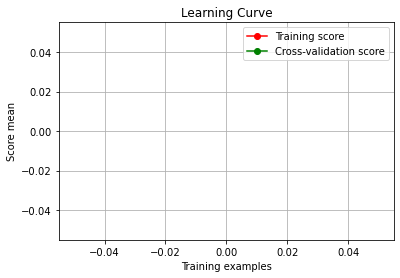

In [94]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

Q2.왜 안 그려지지?

A1. scikit-learn에는 epoch을 집어넣을 수 없음, 다시 말해 learning_curve 말고 KerasClassifier에서 지정함

A2. scikit-learn에서 score는 기본적으로 accuracy임, 따라서 metrics로 accuracy 설정해줘야 함

In [ ]:
def build_fn():
    input_=tf.keras.Input((28,28,1))
    x=tf.keras.layers.Conv2D(32,3)(input_)
    x=tf.keras.layers.ReLU()(x)
    x=tf.keras.layers.MaxPool2D()(x)
    x=tf.keras.layers.Conv2D(32,3)(x)
    x=tf.keras.layers.ReLU()(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(128)(x)
    x=tf.keras.layers.ReLU()(x)
    x=tf.keras.layers.Dense(10)(x)

    model=tf.keras.Model(input_, x)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['acc'])
    
    return model

model=KerasClassifier(build_fn, epochs=5)

train_size, train_score, test_score=learning_curve(model, X_train, y_train, cv=2)

train_sizes 말고 넣은 cv는 cross validation을 의미하고, cv=3는 3번 학습해서 평균을 냄

In [ ]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

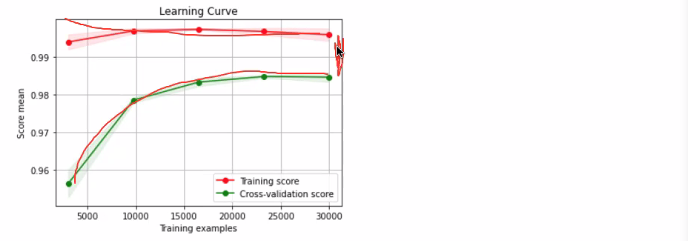

y값이 0.99x와 0.98x이라는 근소한 차이기 때문에 학습이 잘 되었음, overfitting 아님

## Neural networks

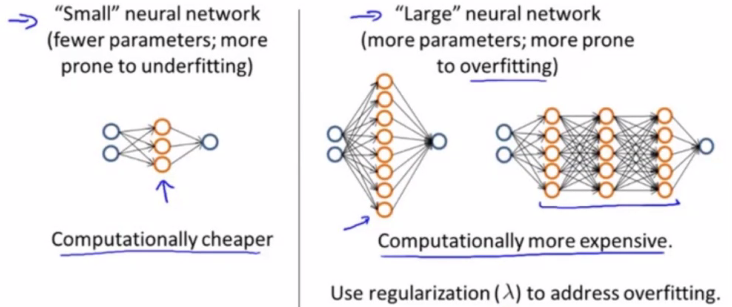


맨오른쪽것 linear 연산함, 학습데이터에 너무 따라가려고 하면서 과적합이 발생하는데, linear 연산하는 네트워크에 대해 과적합을 막기 위해 어떤 기법을 사용하는가?

## 정규화 선형회귀

In [96]:
from sklearn.linear_model import LinearRegression, Perceptron, Lasso, Ridge, ElasticNetCV

- Lasso > L1
- Ridge > L2
- ElasticNet > L1과 L2를 합쳐서 규제 [참고](https://hwiyong.tistory.com/93)

In [99]:
tf.keras.layers.Conv2D

keras.layers.convolutional.Conv2D

tf.keras.regularizers에는 L1, L2, L1L2, l1_l2 등 다양함, regularizer는 kernel과 bias, activity에 붙일 수 있음

model 만들때 dropout을 넣어도 dropout은 학습할 때만 하고, 실제로 예측할 때는 하지 않음, 따라서 model 함수에서 training 인자가 중요하게 작용함(training=True와 training=False로 학습 중인지 아닌지 알려주는 것)

## Overfitting

In [ ]:
tf.keras.regularizers
tf.keras.layers.Dropout
tf.keras.callbacks.EarlyStopping #underfitting에서 overfitting 가는 시점에서 더이상 학습하지 않는 것
                                 #따라서 이전결과와 현재결과를 계속 비교해가면서
    
tf.keras.callbacks.LearningRateScheduler
tf.keras.callbacks.ReduceLROnPlateau #plateau 현상과 관련해서 learning rate를 줄인다